In [ ]:
from torch.utils.data import Dataset
from torch.nn import functional as F
from scipy.interpolate import interp1d
from tqdm.auto import tqdm
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

In [1]:
from ultralytics import YOLO

try:
    model = YOLO('yolov8l.pt')
    model.to(device)
    model.train(data='./data.yaml', epochs=50, imgsz=640)
except Exception as e:
        print(f"Error processing {e}")

100%|██████████| 6.23M/6.23M [00:01<00:00, 4.21MB/s]
New https://pypi.org/project/ultralytics/8.2.28 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196  Python-3.11.3 torch-2.3.1+cpu CPU (11th Gen Intel Core(TM) i7-11800H 2.30GHz)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=./data.yaml, epochs=50, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False,

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x00000236E6327E10>
fitness: 0.4569059577069057
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([    0.28908,      0.5455,      0.2573,     0.73546,      0.2961])
names: {0: 'black-hat', 1: 'bodysurface', 2: 'bodyunder', 3: 'umpire', 4: 'white-hat'}
plot: True
results_dict: {'metrics/precision(B)': 0.7526732915184209, 'metrics/recall(B)': 0.7525001427460293, 'metrics/mAP50(B)': 0.7468898029648108, 'metrics/mAP50-95(B)': 0.4246855304560273, 'fitness': 0.4569059577069057}
save_dir: WindowsPath('runs/detect/train')
speed: {'preprocess': 2.0435078543905885, 'inference': 67.98132754260709, 'loss': 0.0, 'postprocess': 0.5713560566398668}

In [1]:
from ultralytics import YOLO
model = YOLO('./runs/detect/train/weights/best.pt')
results = model.val(data='./data.yaml', split="test", save=True, save_txt=True)

Ultralytics YOLOv8.0.196  Python-3.11.3 torch-2.3.1+cpu CPU (11th Gen Intel Core(TM) i7-11800H 2.30GHz)
Model summary (fused): 168 layers, 3006623 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning C:\Users\jason\OneDrive - 淡江大學\桌面\大三下\人工智慧\期末報告\pool_project.v3i.yolov8\test\labels.cache... 93 images, 0 backgrounds, 0 corrupt: 100%|██████████| 93/93 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:13<00:00,  2.21s/it]
                   all         93       1292      0.757      0.743      0.758      0.431
             black-hat         93        263      0.816      0.624       0.73      0.302
           bodysurface         93        673       0.82      0.857      0.879      0.554
             bodyunder         93         77      0.458      0.623      0.541      0.268
                umpire         93         65      0.925      0.969      0.957      0.759
             white-hat         93        214      0.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
# Extract metrics
mAP_50 = results.box.ap50
mAP_50_95 = results.box.ap
precision, recall = results.box.p, results.box.r
class_names = results.names

overall_mAP_50 = np.mean(mAP_50)
overall_mAP_50_95 = np.mean(mAP_50_95)
overall_precision = np.mean(precision)
overall_recall = np.mean(recall)

mAP_50 = np.concatenate((mAP_50, np.array([overall_mAP_50])))
mAP_50_95 = np.concatenate((mAP_50_95, np.array([overall_mAP_50_95])))
precision = np.concatenate((precision, np.array([overall_precision])))
recall = np.concatenate((recall, np.array([overall_recall])))
class_names[5] = 'Overall'

print(mAP_50)
print(mAP_50_95)
print(precision)
print(recall)
print(class_names)

[    0.73033     0.87891     0.54109     0.95739     0.68224     0.75799]
[    0.30166     0.55398     0.26804     0.75907      0.2704     0.43063]
[    0.81603     0.81953     0.45841     0.92522      0.7639     0.75662]
[    0.62403     0.85695     0.62338     0.96923     0.64019     0.74275]
{0: 'black-hat', 1: 'bodysurface', 2: 'bodyunder', 3: 'umpire', 4: 'white-hat', 5: 'Overall'}


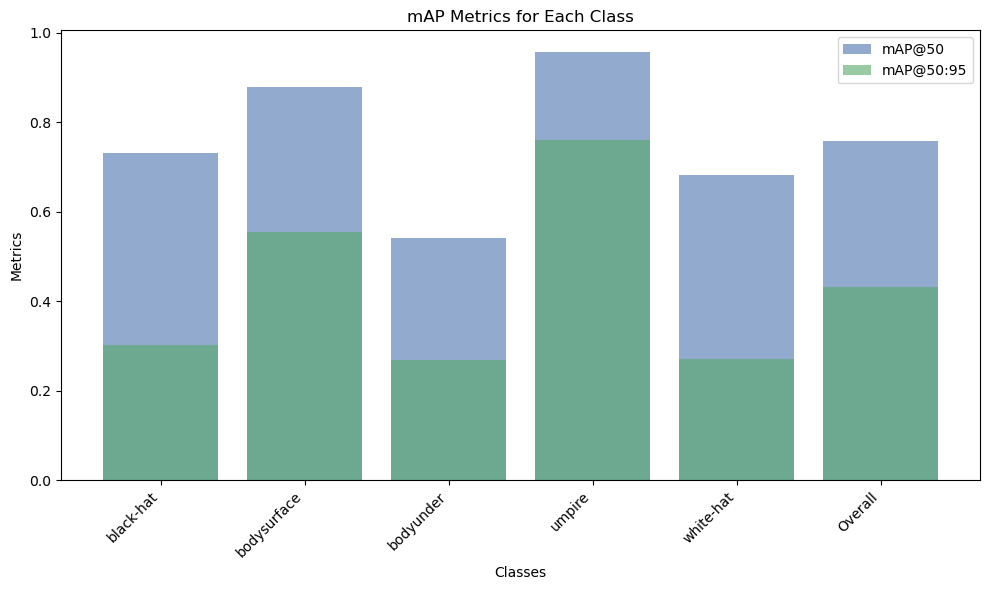

In [3]:
plt.figure(figsize=(10, 6))
plt.bar(np.arange(len(class_names)), mAP_50, color='b', alpha=0.6, label='mAP@50')
plt.bar(np.arange(len(class_names)), mAP_50_95, color='g', alpha=0.6, label='mAP@50:95')
plt.xticks(np.arange(len(class_names)), class_names.values(), rotation=45, ha='right')
plt.xlabel('Classes')
plt.ylabel('Metrics')
plt.title('mAP Metrics for Each Class')
plt.legend()
plt.tight_layout()
plt.show()

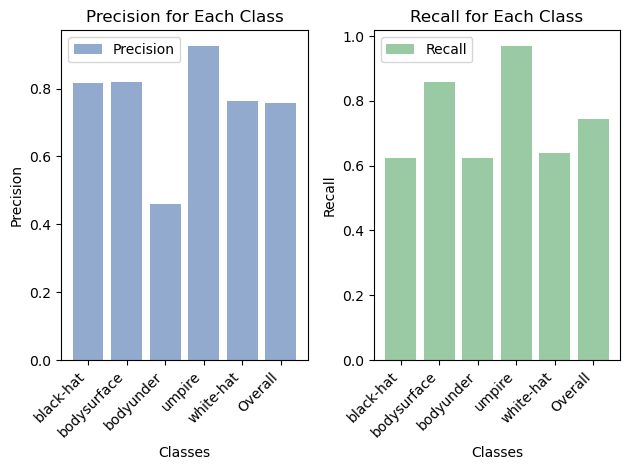

In [4]:
# Plot precision
plt.subplot(1, 2, 1)
plt.bar(np.arange(len(class_names)), precision, color='b', alpha=0.6, label='Precision')
plt.xticks(np.arange(len(class_names)), class_names.values(), rotation=45, ha='right')
plt.xlabel('Classes')
plt.ylabel('Precision')
plt.title('Precision for Each Class')
plt.legend()

# Plot recall
plt.subplot(1, 2, 2)
plt.bar(np.arange(len(class_names)), recall, color='g', alpha=0.6, label='Recall')
plt.xticks(np.arange(len(class_names)), class_names.values(), rotation=45, ha='right')
plt.xlabel('Classes')
plt.ylabel('Recall')
plt.title('Recall for Each Class')
plt.legend()

plt.tight_layout()
plt.show()

In [5]:
%%capture
model.predict(source='./test/images', save=True, save_txt=True)


image 1/93 C:\Users\jason\OneDrive - \\\\\pool_project.v3i.yolov8\test\images\7Collines19_100-NL-FINALE-A-METTELA-MIGNON_399_jpg.rf.ef7dcc5994eb48607b7dcc0ac39bcf8d.jpg: 640x640 8 bodysurfaces, 78.7ms
image 2/93 C:\Users\jason\OneDrive - \\\\\pool_project.v3i.yolov8\test\images\7Collines19_100-PAP-SERIES-RENARD-HERLEM_1249_jpg.rf.6cecb016f5c46bf7b977ef87b0bba6c3.jpg: 640x640 10 bodysurfaces, 62.8ms
image 3/93 C:\Users\jason\OneDrive - \\\\\pool_project.v3i.yolov8\test\images\7Collines19_200-BRA-M-SERIES-VIQUERAT-MARC_2599_jpg.rf.5541abf9024414b905c9b78651af844a.jpg: 640x640 7 bodysurfaces, 2 bodyunders, 60.8ms
image 4/93 C:\Users\jason\OneDrive - \\\\\pool_project.v3i.yolov8\test\images\7Collines19_200-BRA-M-SERIES-VIQUERAT-MARC_499_jpg.rf.ab4fd8e1b7b6aa9e0017fd6326f9f372.jpg: 640x640 6 bodysurfaces, 3 bodyunders, 59.8ms
image 5/93 C:\Users\jason\OneDrive - \\\\\pool_project.v3i.yolov8\test\images\Angers19_100-BRASSE-DAMES-SERIE-7_1249_jpg.rf.1a16be0ba8af73b0b130535764311452.jpg: 640x